# Wine review

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import missingno as msno
import squarify
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size':12})

## Read data set

In [2]:
path = 'data/'
#path = 'input/'
wine_150k = pd.read_csv(path + 'winemag-data_first150k.csv',index_col=0)
wine_130k = pd.read_csv(path + 'winemag-data-130k-v2.csv',index_col=0)
wine = pd.concat([wine_150k,wine_130k],axis=0)
#wine = wine_150k
print("Number of rows and columns:",wine.shape)

Number of rows and columns: (280901, 13)


In [43]:
wine.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,NaN,NaN,NaN,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,NaN,NaN,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,NaN,NaN,NaN,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,NaN,NaN,NaN,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,NaN,NaN,NaN,Provence red blend,Domaine de la Bégude


## Data analysis

In [11]:
wine.describe(include='all',).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,280833,50,US,116901,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,280901,169430,A little bit funky and unsettled when you pop ...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
designation,197701,47239,Reserve,4761,NaN,NaN,NaN,NaN,NaN,NaN,NaN
points,280901,NaN,NaN,NaN,88.1469,3.15153,80,86,88,90,100
price,258210,NaN,NaN,NaN,34.1772,38.6117,4,16,25,40,3300
province,280833,490,California,80755,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_1,234594,1332,Napa Valley,10689,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_2,111464,18,Central Coast,24122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taster_name,103727,19,Roger Voss,25514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taster_twitter_handle,98758,15,@vossroger,25514,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Missing values

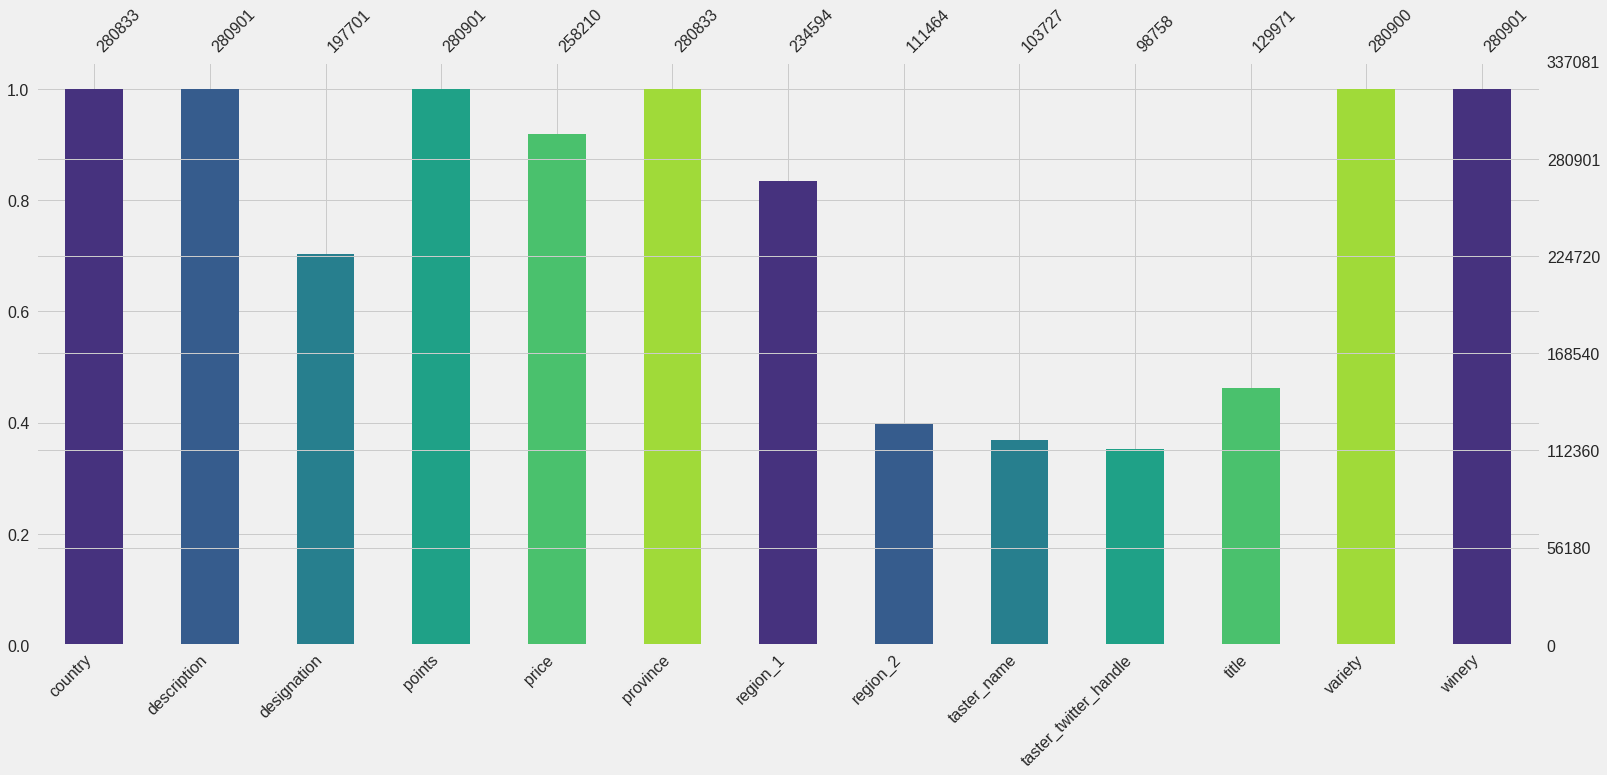

In [5]:
msno.bar(wine,color= sns.color_palette('viridis'))

In [6]:
wine[wine['country'] == 'Tunisia']

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
138139,Tunisia,An irresistible rosé from Tunisia (made by Sic...,Selian Mystère,87,NaN,Tunisia,NaN,NaN,NaN,NaN,NaN,Rosé,Domaine Neferis
139931,Tunisia,Sicily's Calatrasi is also present in Tunisia ...,Selian,85,NaN,Tunisia,NaN,NaN,NaN,NaN,NaN,White Blend,Domaine Neferis


## Distribution of Wine Reviews by Top 20 Countries

Number of country list in data: 50


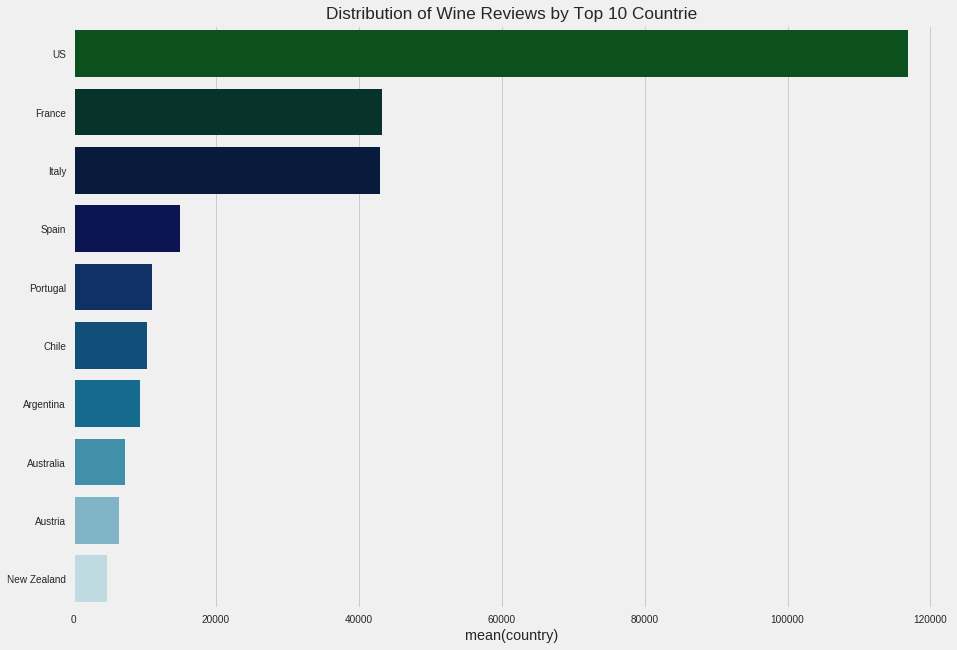

In [12]:
print('Number of country list in data:',wine['country'].nunique())
plt.figure(figsize=(14,10))
cnt = wine['country'].value_counts().to_frame()[0:10]
#plt.xscale('log')
sns.barplot(x= cnt['country'], y =cnt.index, data=cnt, palette='ocean',orient='h')
plt.title('Distribution of Wine Reviews by Top 10 Countrie');

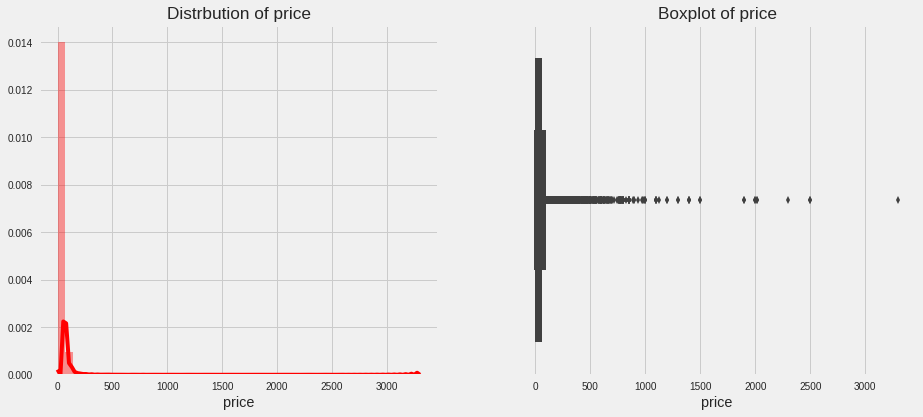

In [8]:
f, ax = plt.subplots(1,2,figsize=(14,6))
ax1,ax2 = ax.flatten()
sns.distplot(wine['price'].fillna(wine['price'].mean()),color='r',ax=ax1)
ax1.set_title('Distrbution of price')
sns.boxplot(x = wine['price'], ax=ax2)
ax2.set_ylabel('')
ax2.set_title('Boxplot of price')

## Country wise average wine price

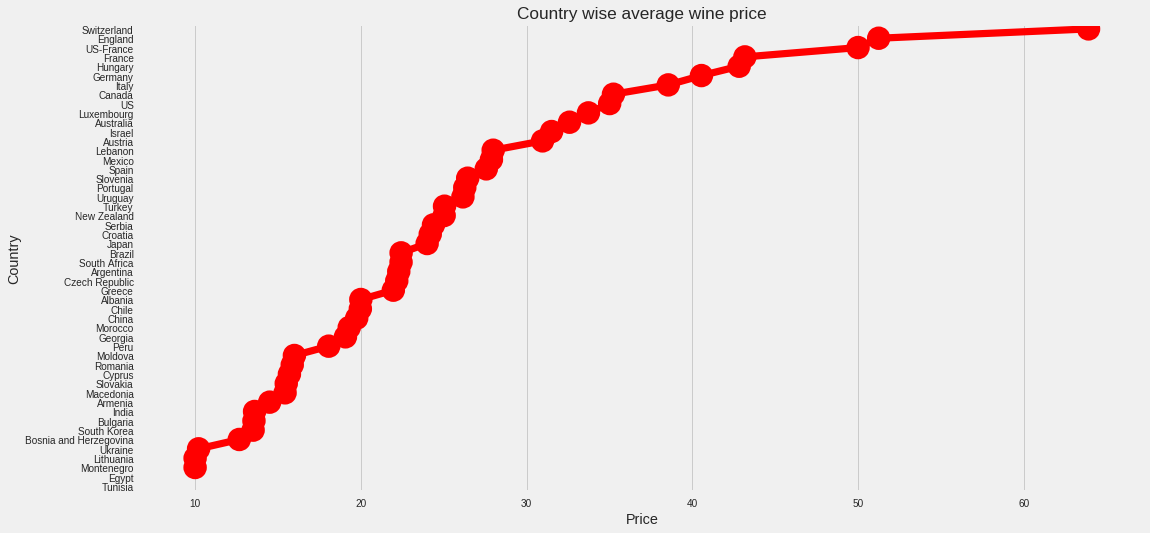

In [9]:
cnt = wine.groupby(['country',]).mean()['price'].sort_values(ascending=False).to_frame()

plt.figure(figsize=(16,8))
sns.pointplot(x = cnt['price'] ,y = cnt.index ,color='r',orient='h',markers='o')
plt.title('Country wise average wine price')
plt.xlabel('Price')
plt.ylabel('Country');

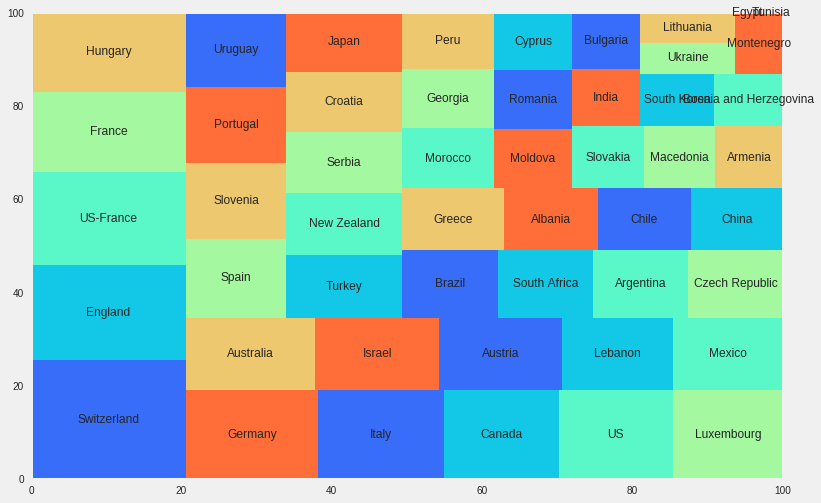

In [10]:
cnt = wine.groupby(['country',])['price'].mean().sort_values(ascending=False).to_frame()
plt.figure(figsize=(12,8))
squarify.plot(cnt['price'].fillna(0.1),color=sns.color_palette('rainbow'),label=cnt.index)

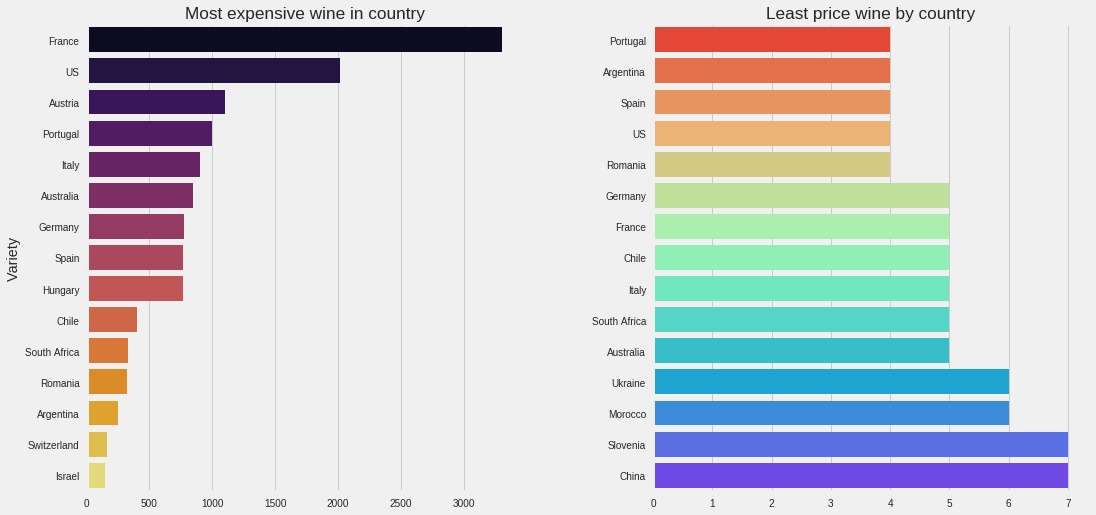

In [11]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

cnt = wine.groupby(['country'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'inferno',ax=ax1)
ax1.set_title('Most expensive wine in country')
ax1.set_ylabel('Variety')
ax1.set_xlabel('')
cnt = wine.groupby(['country'])['price'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette = 'rainbow_r',ax=ax2)
ax2.set_title('Least price wine by country')
ax2.set_ylabel('')
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.3);

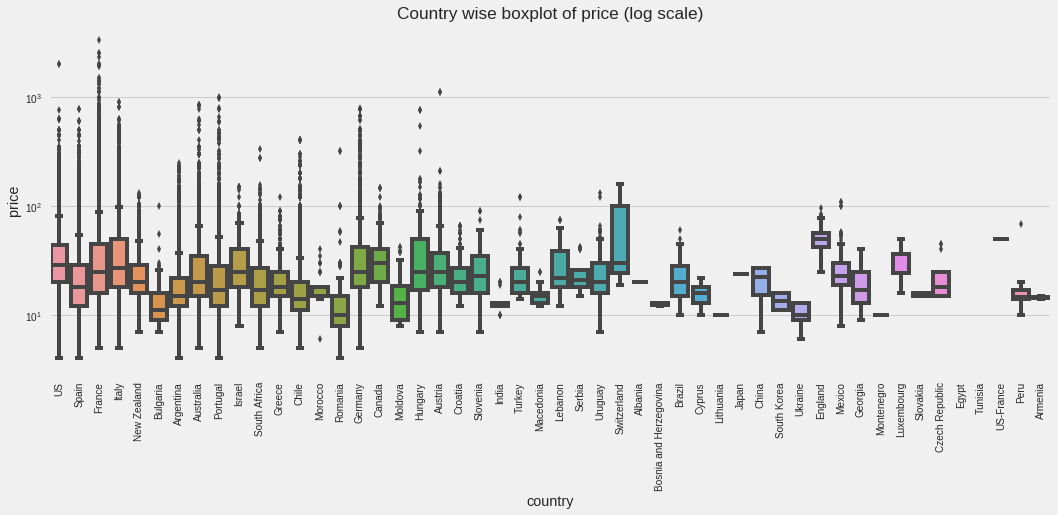

In [12]:
plt.figure(figsize=(16,6))
sns.boxplot(x = wine['country'], y = wine['price'])
plt.yscale("log")
plt.title('Country wise boxplot of price (log scale)')
plt.xticks(rotation=90);

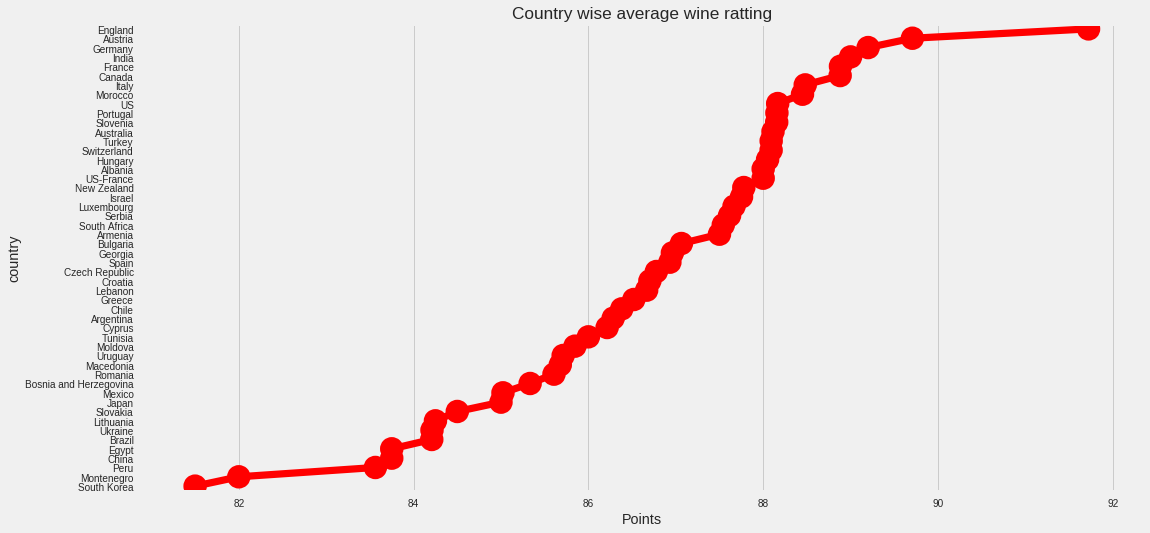

In [13]:
cnt = wine.groupby(['country',]).mean()['points'].sort_values(ascending=False).to_frame()

plt.figure(figsize=(16,8))
sns.pointplot(x = cnt['points'] ,y = cnt.index ,color='r',orient='h')
plt.title('Country wise average wine ratting')
plt.xlabel('Points');

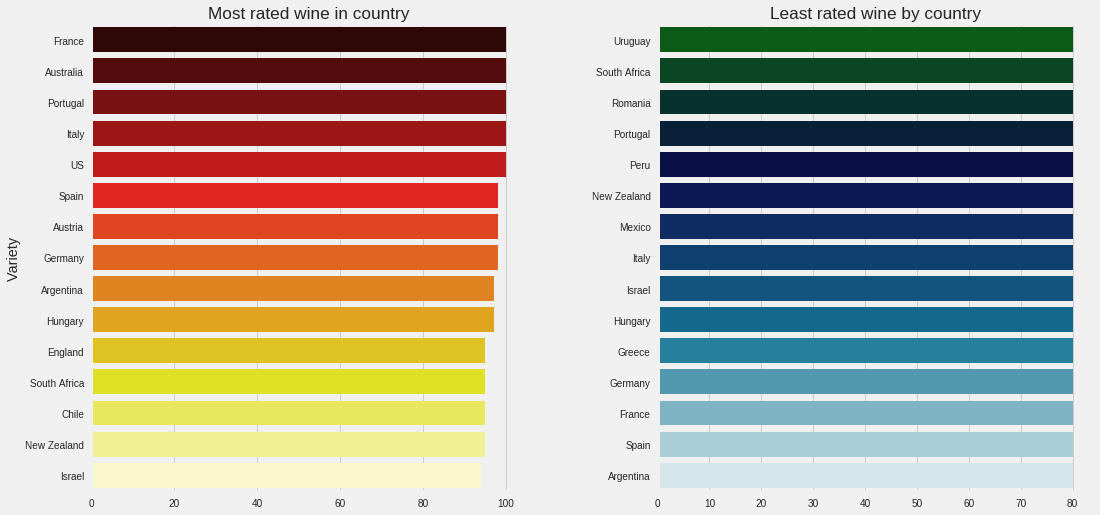

In [14]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

cnt = wine.groupby(['country'])['points'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['points'], y = cnt.index, palette= 'hot',ax=ax1)
ax1.set_title('Most rated wine in country')
ax1.set_ylabel('Variety')
ax1.set_xlabel('')
cnt = wine.groupby(['country'])['points'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['points'], y = cnt.index, palette = 'ocean',ax=ax2)
ax2.set_title('Least rated wine by country')
ax2.set_ylabel('')
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.3);

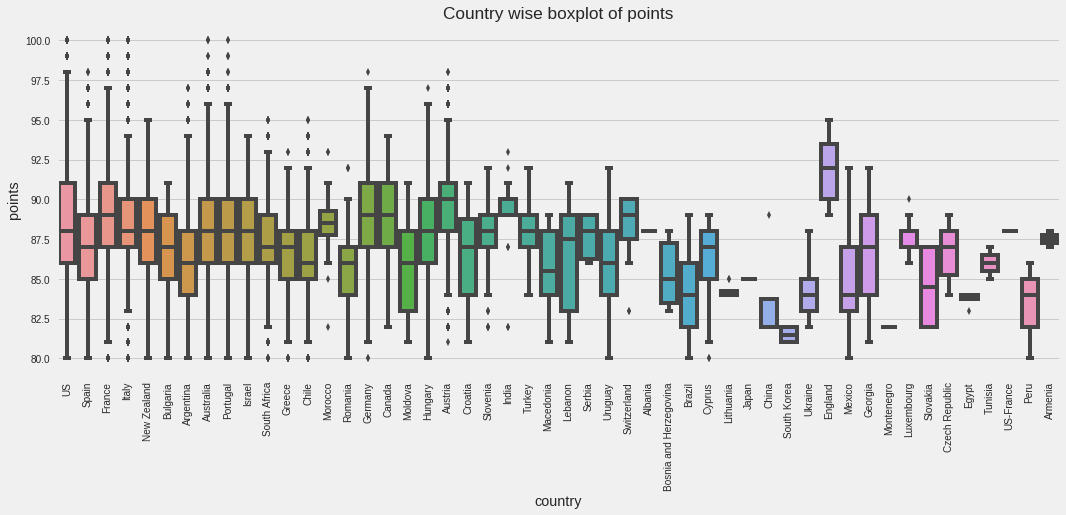

In [15]:
plt.figure(figsize=(16,6))
sns.boxplot(x = wine['country'], y = wine['points'])
#sns.pointplot(x = wine['country'], y = wine['points'])
plt.title('Country wise boxplot of points')
plt.xticks(rotation=90);

## Relation between Price and Points

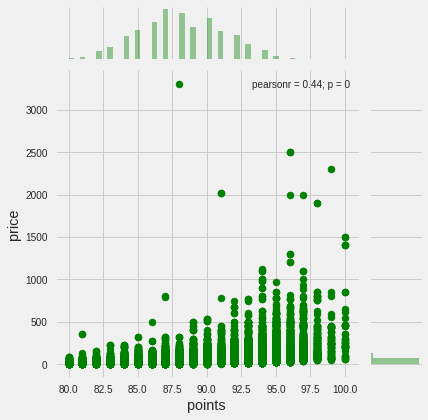

In [16]:
sns.jointplot( x = wine['points'],y = wine['price'],color='g');

## Top most wine by variety

Number of varity of wines 756


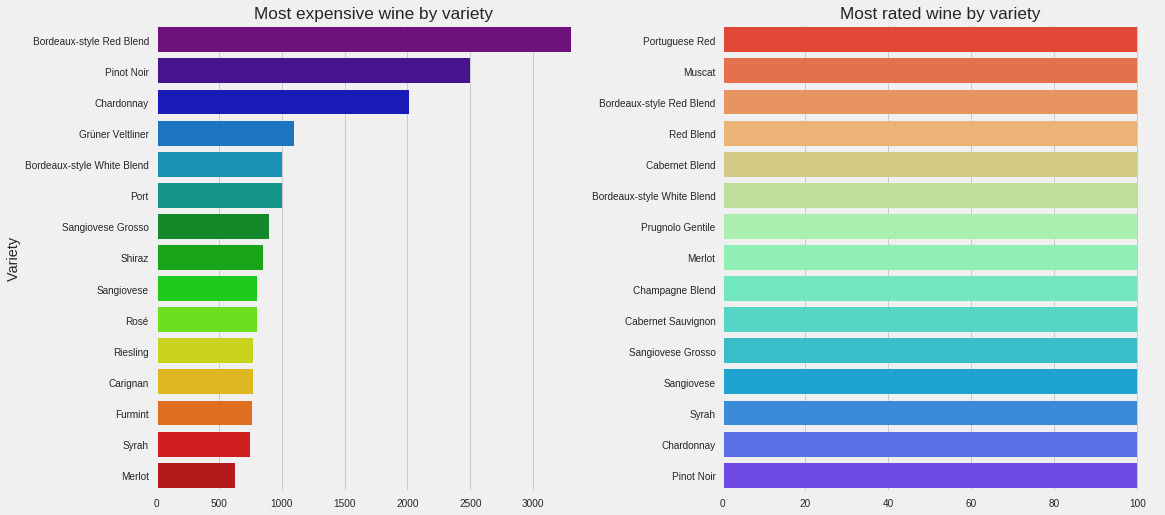

In [17]:
print('Number of varity of wines',wine['variety'].nunique())
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

cnt = wine.groupby(['variety'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'spectral',ax=ax1)
ax1.set_title('Most expensive wine by variety')
ax1.set_ylabel('Variety')
ax1.set_xlabel('')
cnt = wine.groupby(['variety'])['points'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['points'], y = cnt.index, palette = 'rainbow_r',ax=ax2)
ax2.set_title('Most rated wine by variety')
ax2.set_ylabel('')
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.3);

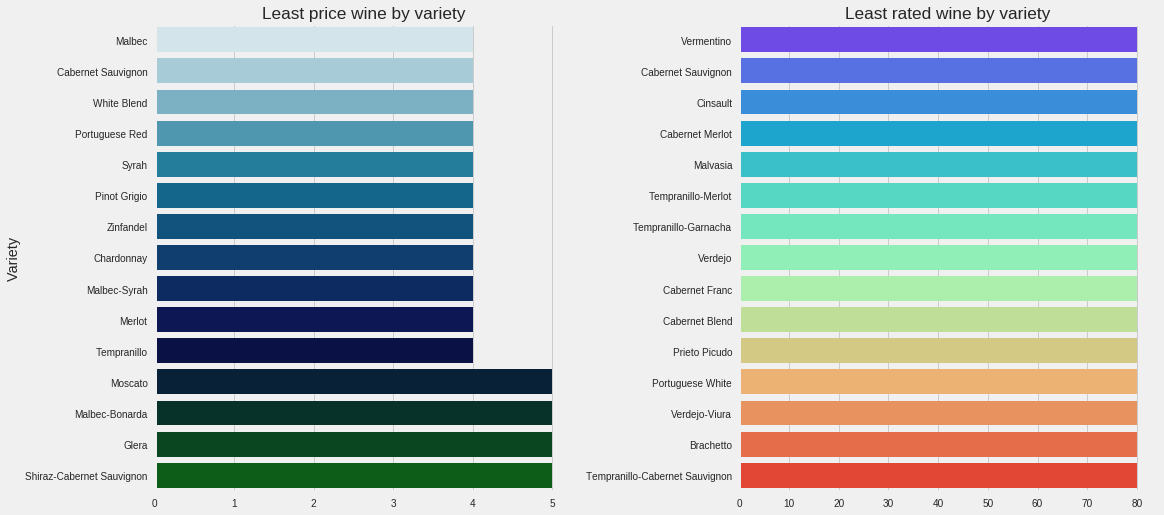

In [18]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

cnt = wine.groupby(['variety'])['price'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index,palette = 'ocean_r',ax=ax1)
ax1.set_title('Least price wine by variety')
ax1.set_xlabel('')
ax1.set_ylabel('Variety')

cnt = wine.groupby(['variety'])['points'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['points'], y = cnt.index,palette= 'rainbow', ax=ax2)
ax2.set_title('Least rated wine by variety')
ax2.set_xlabel('')
ax2.set_ylabel('')
plt.subplots_adjust(wspace=0.4);

In [19]:
cnt = wine.groupby(['country','points'])['price'].agg(['count','min','max','mean']).sort_values(by='mean',ascending=False)[:10]
cnt.reset_index(inplace=True)
cnt.style.background_gradient(cmap='PuBu',high=0.5)

,country,points,count,min,max,mean
0,France,100,12,150,1500,877.583
1,Germany,98,1,775,775,775
2,France,99,10,159,2300,632.4
3,Australia,99,2,300,850,575
4,Portugal,100,2,450,650,550
5,France,98,43,70,1900,448.814
6,Spain,98,3,440,450,446.667
7,Germany,97,16,245,775,392.562
8,Portugal,99,3,268,426,373.333
9,Italy,100,11,195,550,334.545


In [20]:
wine.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')

## Designation
* The vineyard within the winery where the grapes that made the wine are from.
* A [vineyard](#https://en.wikipedia.org/wiki/Vineyard) is a plantation of grape-bearing vines, grown mainly for winemaking, but also raisins, table grapes and non-alcoholic grape juice. The science, practice and study of vineyard production is known as viticulture.

Number of vineyard designation 47239


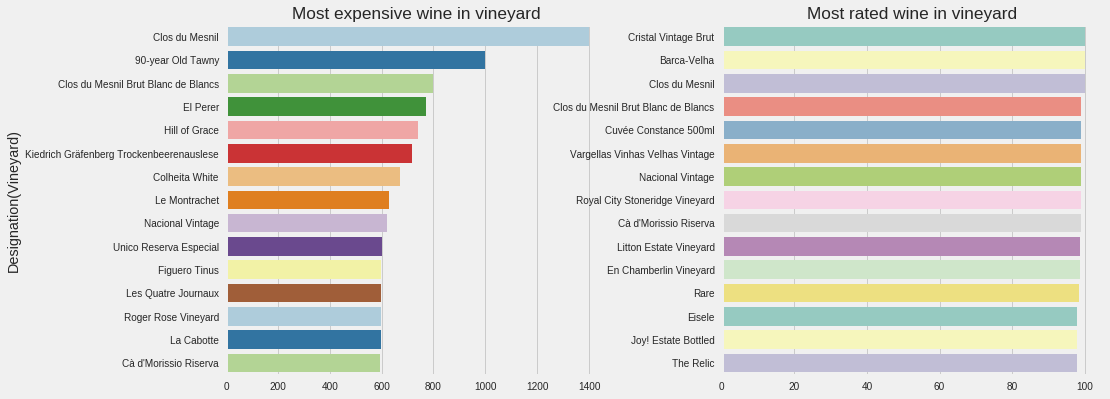

In [21]:
print('Number of vineyard designation',wine['designation'].nunique())
cnt = wine.groupby(['designation'])['price'].mean().to_frame().sort_values(by='price',ascending=False)[:15]
f,ax = plt.subplots(1,2,figsize= (14,6))
ax1,ax2 = ax.flatten()
sns.barplot(cnt['price'], y = cnt.index, palette = 'Paired', ax = ax1)
ax1.set_xlabel('')
ax1.set_ylabel('Designation(Vineyard)')
ax1.set_title('Most expensive wine in vineyard')

cnt = wine.groupby(['designation'])['points'].mean().to_frame().sort_values(by = 'points', ascending = False)[:15]
sns.barplot(cnt['points'], y = cnt.index, palette = 'Set3', ax = ax2)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('Most rated wine in vineyard')
plt.subplots_adjust(wspace=0.3)

## Winery
* A [Winery](#https://en.wikipedia.org/wiki/Winery) is a building or property that produces wine, or a business involved in the production of wine, such as a wine company.

Number of winerys: 19186


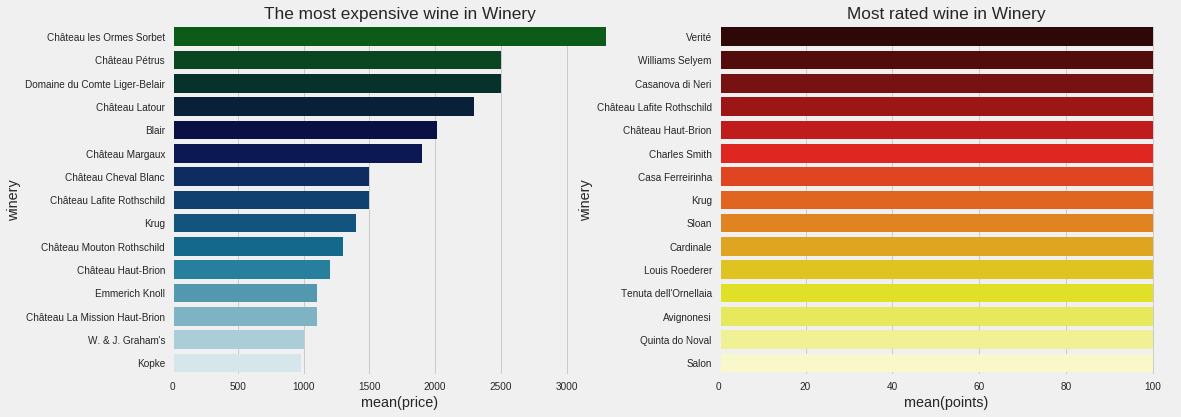

In [22]:
print('Number of winerys:',wine['winery'].nunique())
f,ax = plt.subplots(1,2,figsize=(16,6))
ax1,ax2 = ax.flatten()
cnt = wine.groupby(['winery'])['price'].max().to_frame().sort_values(by='price',ascending=False)[:15]
sns.barplot(cnt['price'],y = cnt.index,palette = 'ocean',ax = ax1)
ax1.set_title('The most expensive wine in Winery')
cnt = wine.groupby(['winery'])['points'].max().to_frame().sort_values(by = 'points', ascending = False)[:15]
sns.barplot(cnt['points'], y = cnt.index, palette = 'hot')
plt.title('Most rated wine in Winery');

## Province

Number of province: 490


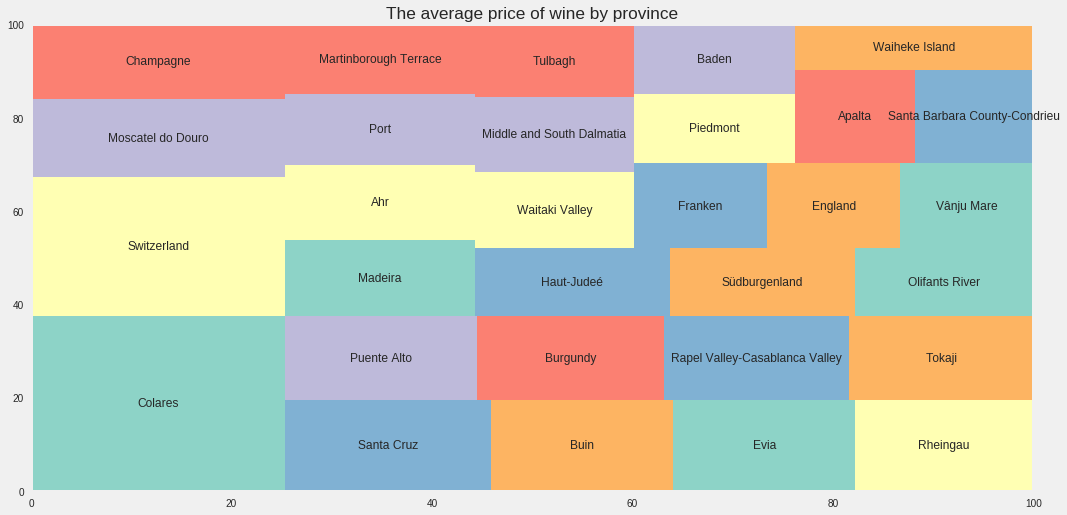

In [23]:
print('Number of province:',wine['province'].nunique())
cnt = wine.groupby(['province'])['price'].mean().sort_values(ascending=False).to_frame()[:30]
plt.figure(figsize=(16,8))
squarify.plot(cnt['price'].fillna(0.001),label=cnt.index,color= sns.color_palette('Set3'))
plt.title('The average price of wine by province');

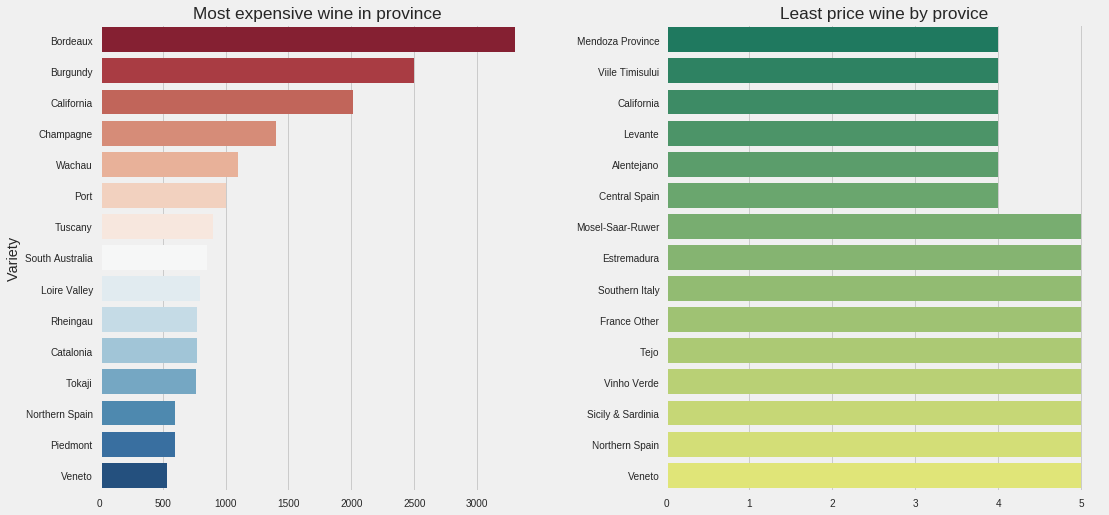

In [24]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

cnt = wine.groupby(['province'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'RdBu',ax=ax1)
ax1.set_title('Most expensive wine in province')
ax1.set_ylabel('Variety')
ax1.set_xlabel('')
cnt = wine.groupby(['province'])['price'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette = 'summer',ax=ax2)
ax2.set_title('Least price wine by provice')
ax2.set_ylabel('')
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.3);

In [25]:
cnt = wine.groupby(['province','country','points'])['price'].agg(['count','min','max','mean']).sort_values(by='mean',ascending= False)[:10]
cnt.reset_index(inplace=True)
cnt.style.background_gradient(cmap='Blues',high=0.5)

,province,country,points,count,min,max,mean
0,Bordeaux,France,99,1,2300,2300,2300
1,Champagne,France,100,6,250,1400,887.667
2,Bordeaux,France,100,6,150,1500,867.5
3,South Australia,Australia,99,1,850,850,850
4,Rheingau,Germany,98,1,775,775,775
5,Port,Portugal,100,1,650,650,650
6,Bordeaux,France,98,16,70,1900,586.062
7,Burgundy,France,99,1,560,560,560
8,Rheingau,Germany,97,7,445,775,551.571
9,Colares,Portugal,93,1,495,495,495


## Region1

Number of province: 1332


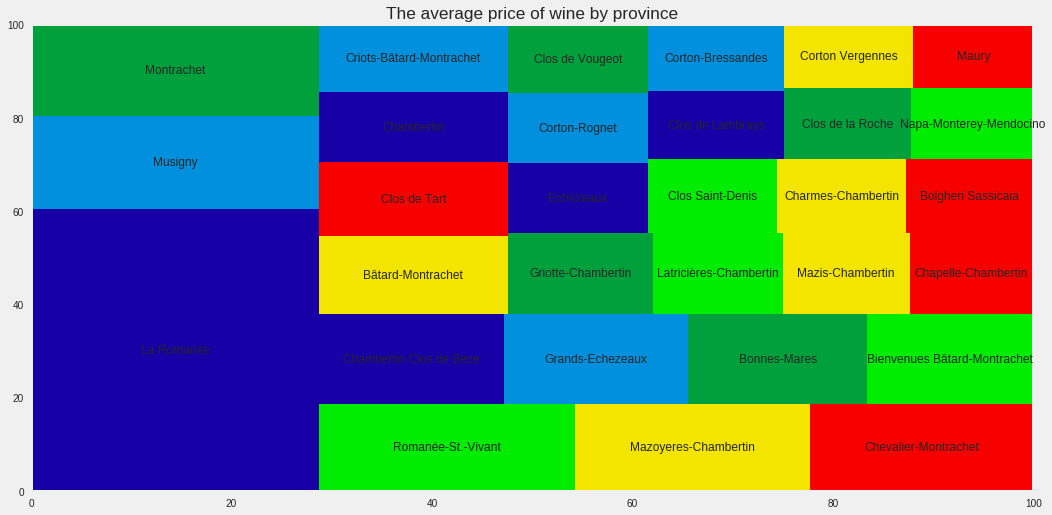

In [26]:
print('Number of province:',wine['region_1'].nunique())
cnt = wine.groupby(['region_1'])['price'].mean().sort_values(ascending=False).to_frame()[:30]
plt.figure(figsize=(16,8))
squarify.plot(cnt['price'].fillna(0.001),label=cnt.index,color= sns.color_palette('spectral'))
plt.title('The average price of wine by province');

In [27]:
cnt = wine.groupby(['country','province','points','region_1',])['price'].agg(
    ['count','min','max','mean']).sort_values(by = 'mean',ascending = False)[:20]
cnt.reset_index(inplace = True)
cnt.style.highlight_max()

,country,province,points,region_1,count,min,max,mean
0,France,Bordeaux,99,Pauillac,1,2300,2300,2300
1,France,Burgundy,96,La Romanée,2,2000,2500,2250
2,France,Bordeaux,100,Saint-Émilion,1,1500,1500,1500
3,France,Bordeaux,100,Pauillac,1,1500,1500,1500
4,France,Bordeaux,98,Margaux,4,380,1900,1140
5,France,Burgundy,94,La Romanée,1,1125,1125,1125
6,France,Champagne,100,Champagne,6,250,1400,887.667
7,Australia,South Australia,99,South Australia,1,850,850,850
8,Australia,South Australia,98,South Australia,3,850,850,850
9,France,Bordeaux,100,Pessac-Léognan,2,848,848,848


## Region2

In [28]:
print('Number of reqion2: ',wine['region_2'].nunique())
print('Null values in reqion2: ',wine['region_2'].isnull().sum())
cnt = wine.groupby(['country','province','region_1','region_2','points'])['price'].agg(
    ['count','min','max','mean']).sort_values(by = 'mean',ascending = False)[:20]
cnt.reset_index(inplace=True)
cnt.style.set_table_styles([{'selector': 'tr:hover','props': [('background-color', 'yellow')]}])

Number of reqion2:  18
Null values in reqion2:  169437


,country,province,region_1,region_2,points,count,min,max,mean
0,US,California,Sonoma County,Sonoma,97,2,450,450,450
1,US,California,Sonoma County,Sonoma,100,1,450,450,450
2,US,California,Sonoma County,Sonoma,98,2,300,300,300
3,US,California,Stags Leap District,Napa,98,1,265,265,265
4,US,California,Atlas Peak,Napa,99,1,250,250,250
5,US,California,Rutherford,Napa,100,2,245,245,245
6,US,California,Napa Valley,Napa,99,7,150,300,238.571
7,US,California,St. Helena,Napa,98,3,185,250,228.333
8,US,California,Napa Valley,Napa,98,11,75,625,226.818
9,US,California,Stags Leap District,Napa,100,1,215,215,215


In [29]:
cnt = wine.groupby(['country','region_2']).count().reset_index()
cnt['country'].unique()

array(['US'], dtype=object)

* Region 2 details are available only for US

## taster_name

                        count unique         top   freq
taster_name            103727     19  Roger Voss  25514
taster_twitter_handle   98758     15  @vossroger  25514


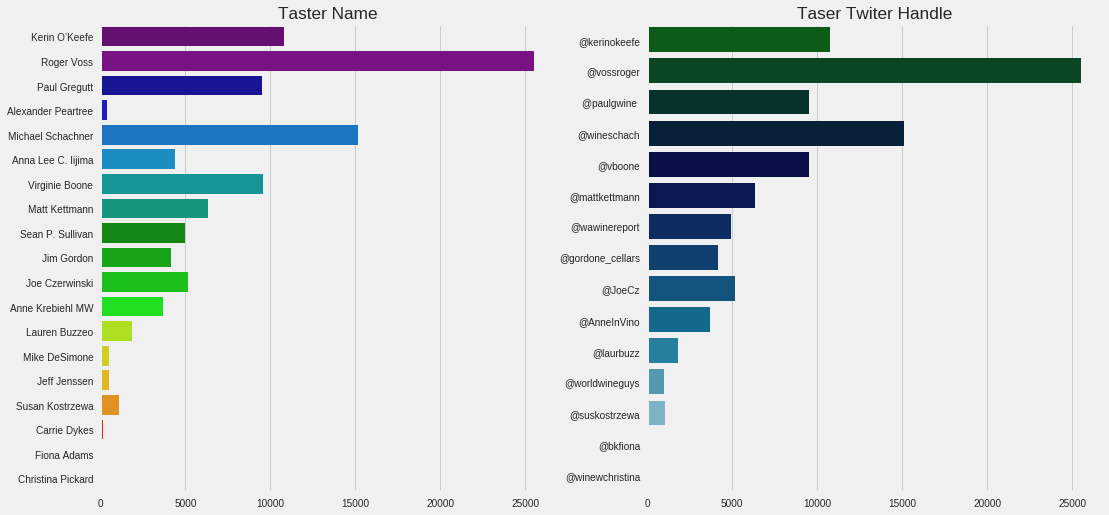

In [30]:
print(wine[['taster_name','taster_twitter_handle']].describe().T)
f,ax = plt.subplots(1,2, figsize = (16,8))
ax1,ax2 = ax.flatten()
sns.countplot(y = wine['taster_name'], palette = 'spectral', ax =ax1)
ax1.set_title('Taster Name')
ax1.set_xlabel('')
ax1.set_ylabel('')
sns.countplot(y = wine['taster_twitter_handle'], palette = 'ocean', ax =ax2)
ax2.set_title('Taser Twiter Handle')
ax2.set_xlabel('')
ax2.set_ylabel('');

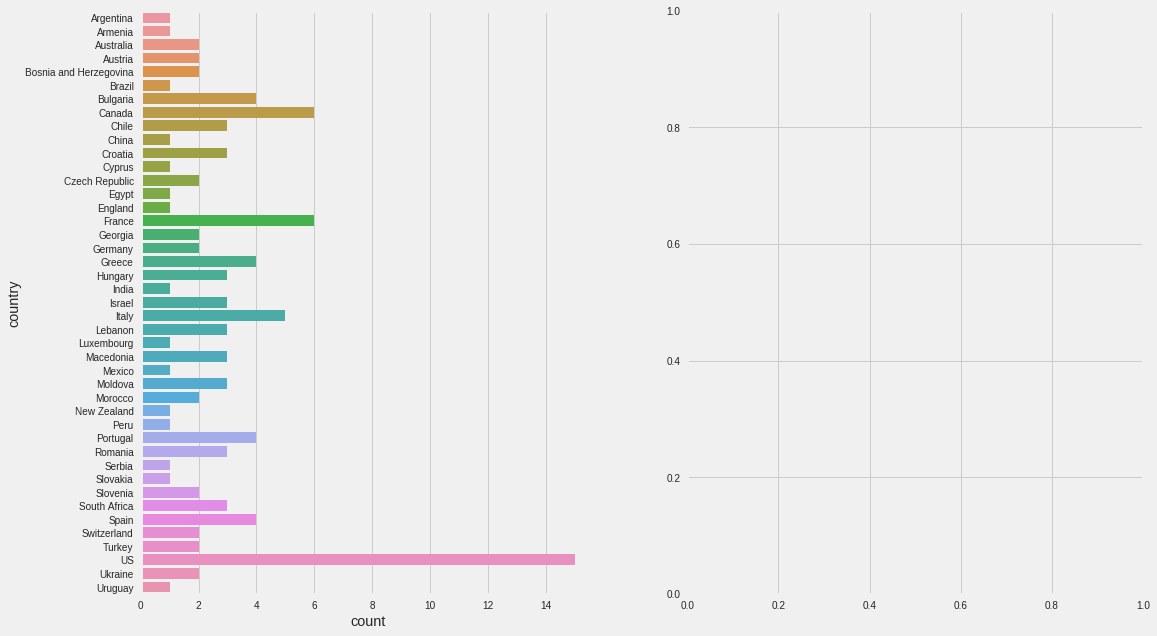

In [31]:
f,ax = plt.subplots(1,2, figsize = (16,10))
ax1,ax2 = ax.flatten()
cnt = wine.groupby(['country','taster_name',]).count().reset_index()
sns.countplot(y = cnt['country'], ax = ax1)


## Description: 
* A few sentences from a sommelier describing the wine's taste, smell, look, feel, etc.
<centre><img src = 'https://thinkingspirits.files.wordpress.com/2013/12/candycrush-copy.jpg'></center>

(-0.5, 399.5, 199.5, -0.5)

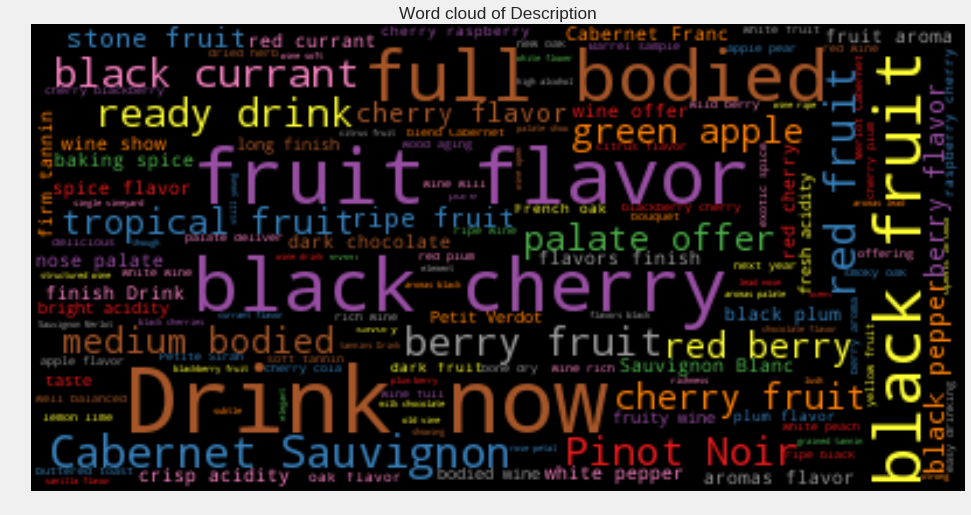

In [37]:
plt.figure(figsize= (16,8))
plt.title('Word cloud of Description')
wc = WordCloud(max_words=1000,max_font_size=40,background_color='black', stopwords = STOPWORDS,colormap='Set1')
wc.generate(' '.join(wine['description']))
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

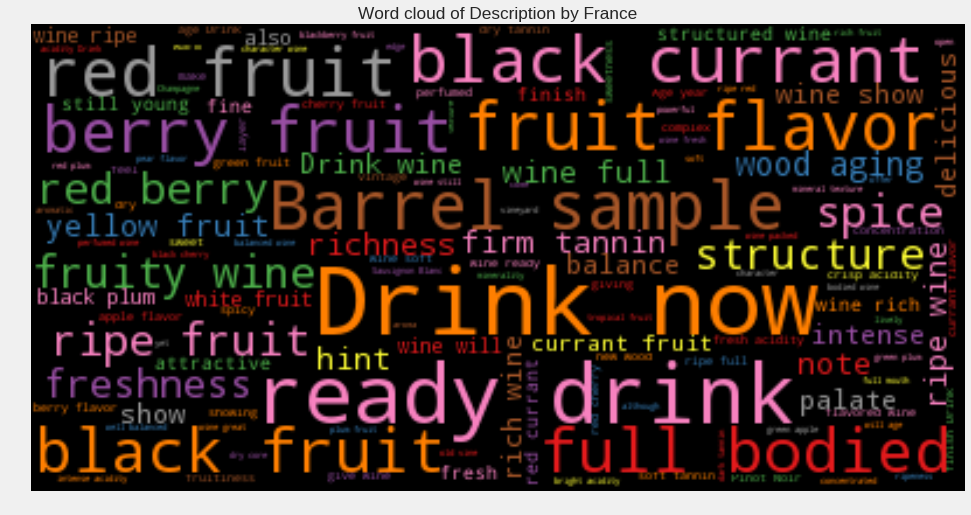

In [35]:
plt.figure(figsize= (16,8))
plt.title('Word cloud of Description by France')
wc = WordCloud(max_words=1000,max_font_size=40,background_color='black', stopwords = STOPWORDS)
wc.generate(' '.join(wine[wine['country'] =='France']['description']))
plt.imshow(wc.recolor(colormap='Set2'),interpolation="bilinear")
plt.axis('off')

## Collabrative filtering

In [4]:
from scipy.spatial.distance import cosine

In [32]:
n_province = wine.province.nunique()
n_variety = wine.variety.nunique()
print('Number of province {} and variety {}'.format( n_province,n_variety))

Number of province 491 and variety 757


In [33]:
wine['province'].fillna('No loc', inplace=True)
wine['country'].fillna('No loc', inplace=True)
wine['variety'].fillna('unknown', inplace= True)

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
wine['province_id'] = le.fit_transform(wine['province'])
wine['variety_id'] = le.fit_transform(wine['variety'])

In [35]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(wine[['province_id','variety_id','points']], test_size=0.25)

In [36]:
# create user-item matrix one for train and another for test
train_data_matrix = np.zeros((n_province, n_variety))
for line in train_data.itertuples():
    #print(line)
    train_data_matrix[line[1]-1, line[2]-1] = line[3]
test_data_matrix = np.zeros((n_province, n_variety))
for line in test_data.itertuples():
    test_data_matrix[line[1]-1,line[2]-1] = line[3]

## cosine similarity

In [37]:
from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_data_matrix, metric = 'cosine')
item_similarity = pairwise_distances(train_data_matrix.T, metric = 'cosine')

In [38]:
def predict(rating, similarity, Type= 'user'):
    if Type == 'user':
        mean_user_rating = rating.mean(axis=1)
        #You use np.newaxis so that mean_user_rating has same format as ratings
        rating_diff = (rating - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:,np.newaxis] + similarity.dot(rating_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    
    elif Type == 'item':
        pred = rating.dot(similarity) / np.array([np.abs(similarity).sum(axis =1)])
        
    return pred

In [39]:
item_prediction = predict(train_data_matrix,item_similarity, Type='item')
user_prediction = predict(train_data_matrix, user_similarity, Type='user')

In [46]:
from sklearn.metrics import mean_squared_error

def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return mean_squared_error(prediction,ground_truth)**0.5

In [47]:
print('User base CF RMSE:',rmse(user_prediction,test_data_matrix))
print('item base CF RMSE:',rmse(item_prediction,test_data_matrix))

User base CF RMSE: 74.8531532788
item base CF RMSE: 83.9959165634


## KNN

In [4]:
import re
import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors


In [59]:
wine.isnull().sum()

country                       0
description                   0
designation               83200
points                        0
price                     22691
province                      0
region_1                  46307
region_2                 169437
taster_name              177174
taster_twitter_handle    182143
title                    150930
variety                       1
winery                        0
dtype: int64

In [5]:
tf_idf = TfidfVectorizer(max_features= 100, stop_words= 'english',ngram_range=(1,3),)
vector = tf_idf.fit_transform(wine['description'])

In [6]:
knn = NearestNeighbors(n_neighbors= 30, algorithm= 'brute', metric= 'cosine')
knn_fit = knn.fit(vector)